# Life Expectancy and GDP data visualization project

## Introduction

The dataset provided _all_data.csv_ has the following columns of data:
* Country - nation, for six countries (Chile, China, Germany, Mexico, USA, Zimbabwe)
* Year - the year for the observation (for the years 2000-2015)
* Life expectancy at birth (years) - life expectancy value in years
* GDP - Gross Domestic Product in U.S. dollars

So we have timeline data about Life Expectancy and GDP in six countries.

My basic plan will be to examine, especially through graphs:
* How GDP and Life expectancy changed in these countries during these years.
* Whether there was a strong corrleation between GDP and Life expectancy during these years.


## Preliminaries

In [36]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np;


In [29]:
# Read the dataset into a dataframe
df_all = pd.read_csv('all_data.csv') 
# Rename some columns
df_all = df_all.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
# Examine a few data rows
print(df_all.head())

  Country  Year  Life_expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Life expectancy and GDP per year - all countries together

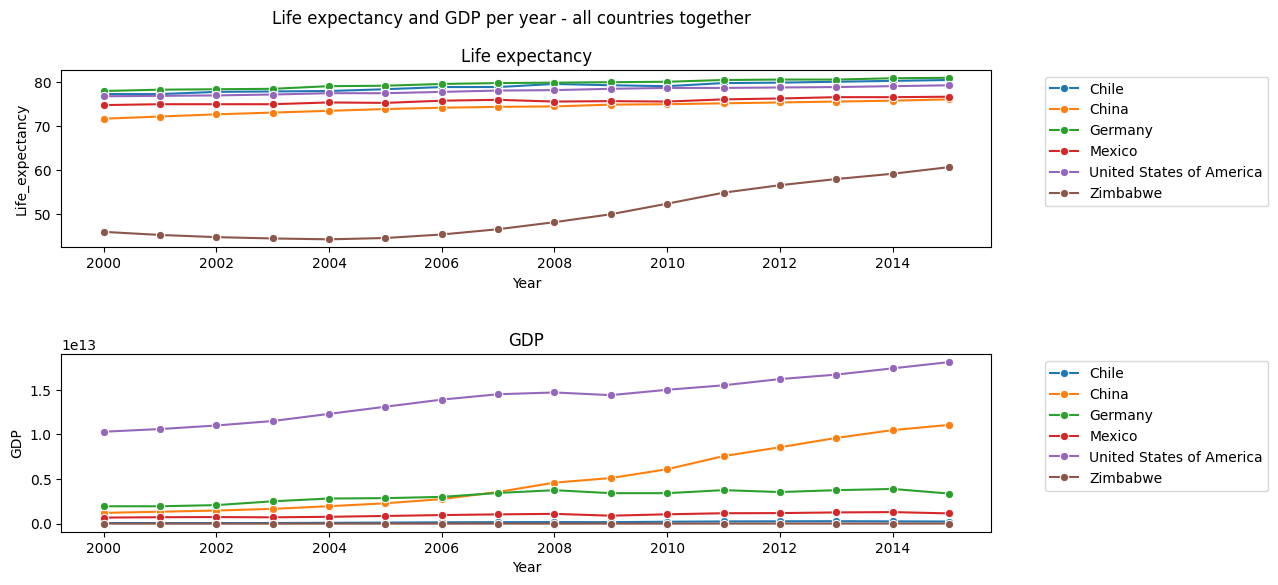

In [30]:
plt.figure(figsize=(12, 6))
#
plt.subplot(2,1,1)
sns.lineplot(data=df_all, x='Year', y='Life_expectancy', marker='o', hue='Country')
plt.title('Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
#
plt.subplot(2,1,2)
sns.lineplot(data=df_all, x='Year', y='GDP', marker='o', hue='Country')
plt.title('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
#
plt.suptitle('Life expectancy and GDP per year - all countries together')
plt.subplots_adjust(hspace=0.6)
plt.show()

# Observations

* Life expectancy
  * Zimbabwe was significanly lower than the other countries in Life Expectancy during these years. LE was between 45-55 in Zimbabwe in this year range, and 70-80 in other countries.
  * On the other hand the Life expectancy in Zimbabwe increased significantly during these years, to nearly 60.
  * The Life expectancy in the other countries hasn's changed much. It seems to have increased a little, but we cannot see that clearly in the current graph.

* GDP
  * USA was significant higher in GDP than the other countries during these years. It was also rising.
  * China was not significantly higher than other countries until 2007. But then it started a stee[] increase in GDP, and rose above the other countries except USA.
  * For the other foun counties, it difficult to see on this graph what is their scale of GDP. Their GDP does not seem to have increasted during these years, but it's difficult to tell.
  * Next in GDP size is Germay, then Mexico. Chile and Zimbabwe were the lowest in GDP during these years.

* Life expectancy vis-a-vis GDP
  * Generally speaking, the LIfe Expectancy graph and the GDP graph look different. We do not see a clear correlation between Life Expectancy and GDP, when comparing different countries. About the relationship between GDP and Life Expectacny within each country, we'll see below.
  
-------------------------
  
Let's redraw the denser portions of these graphs in order to see them more clearly.

We'll start with Life Expectancy, and draw the graph without Zimbabwe.

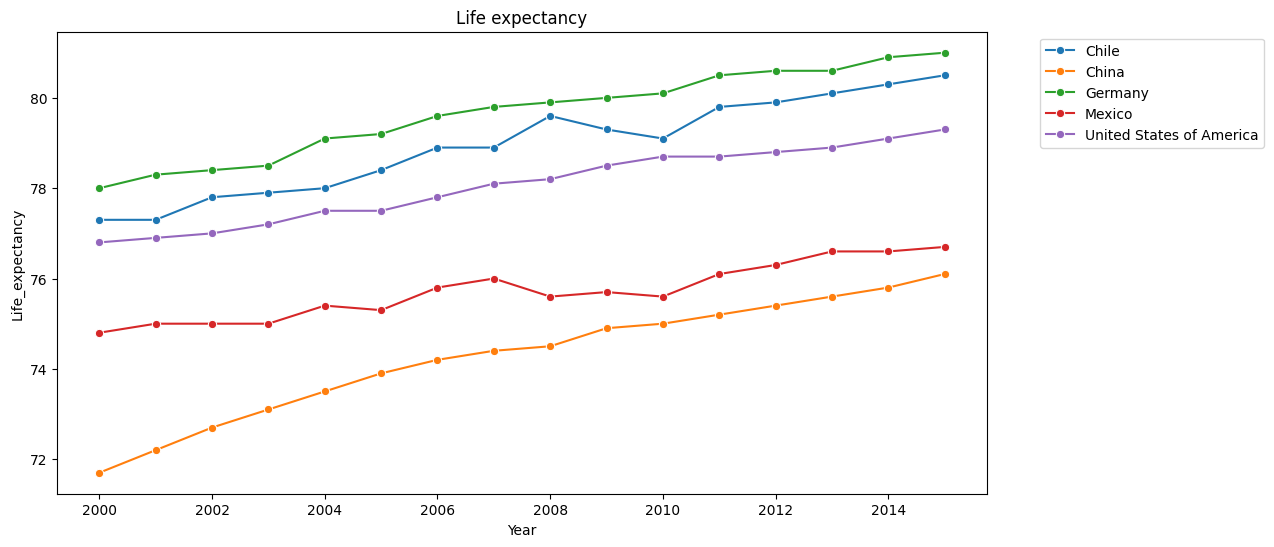

In [31]:
plt.figure(figsize=(12, 6))
df2 = df_all[~df_all['Country'].isin(['Zimbabwe'])]
sns.lineplot(data=df2, x='Year', y='Life_expectancy', marker='o', hue='Country')
plt.title('Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.show()
df2 = None

From this enlarged portion of the Life Expectancy graph, we can see that for all the related five countries, Life Expectancy steadily increased during the relevant years, with more or less the same pace. The overall increase in Life Expectancy during these 15 years is about 2 years.

Now let's un-dense the overall GDP graph. For GDP, the problem with the previous graph seems to be that different countries do merely have different GDP levels, but they are on different scales of GDP. To compensate the this, let's use a log-scale for the GDP.

In [38]:
# Define a formatter function to convert log values back to original values
# Display values in scientific notation e.g. 1.2e13
def log_formatter(y, pos):
    return f'{np.exp(y):.1e}'

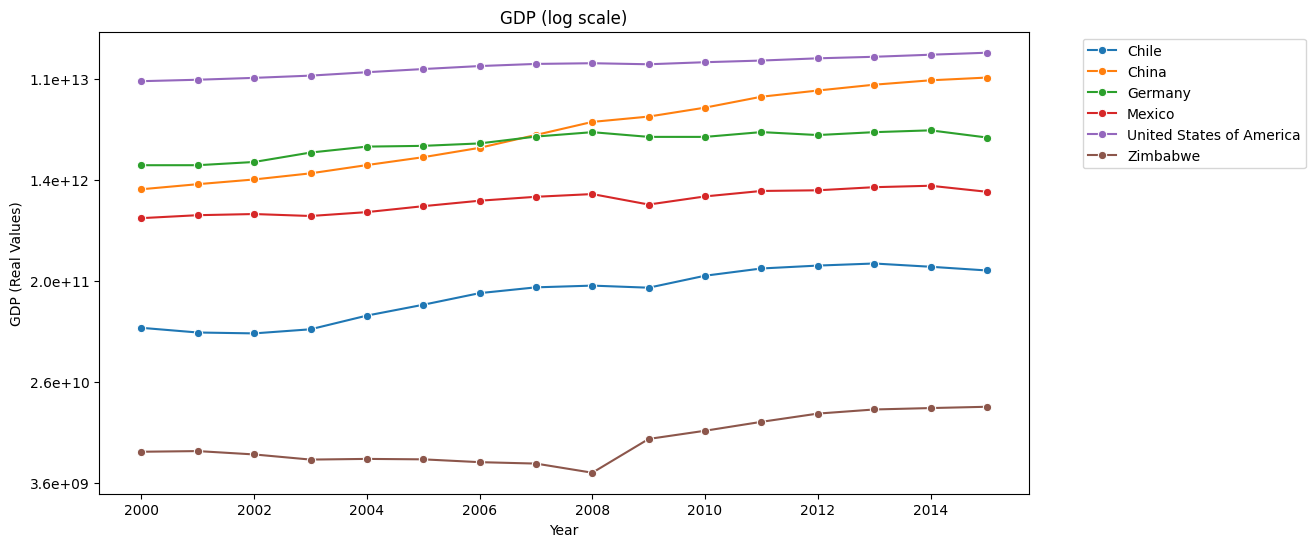

In [40]:
plt.figure(figsize=(12, 6))
df2 = df_all.copy()
df2.GDP = np.log(df2.GDP)
sns.lineplot(data=df2, x='Year', y='GDP', marker='o', hue='Country')
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_formatter)) # Set the y-axis to use the custom formatter
plt.title('GDP (log scale)')
plt.ylabel('GDP (Real Values)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move the legend outside the plot
plt.show()
df2 = None

We can now see clearly the different scales of GDP (in US dollars):
* USA and China near 1e13
* Germany and Mexico near 1e12
* Chile near 1e11
* Zimbabwe near 1e9

For some of the countries (Zimbabwe, Chile, China) there is a visible increase in GDP even on the log scale. Which implies that they enjoyed a significant real increase in GDP during the relevant years.

## Life expectancy and GDP per year - graph per country

In [42]:
## Get a list of all the countries
countries = df_all['Country'].value_counts().index

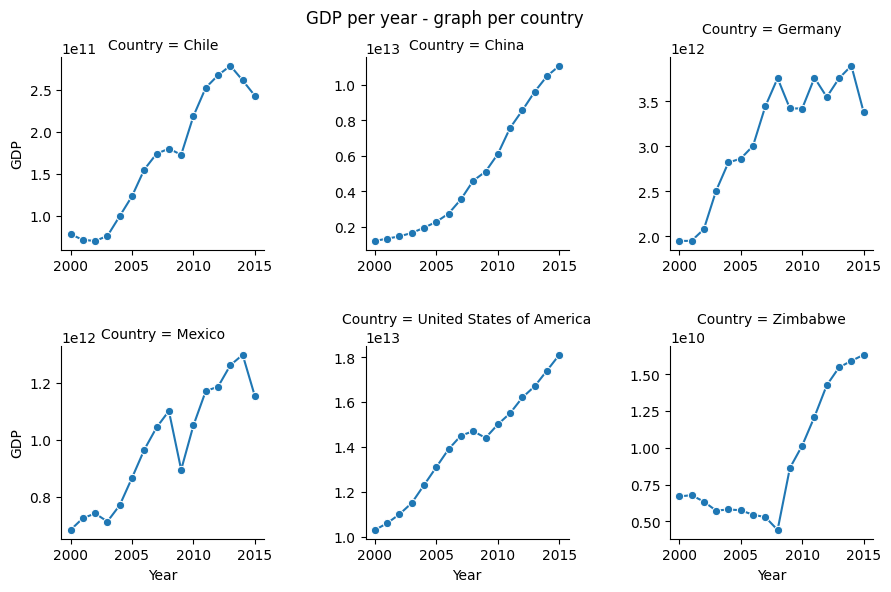

In [27]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=3, sharex=False, sharey=False)
g.map(sns.lineplot, 'Year', 'GDP', marker='o')
plt.subplots_adjust(top=0.9, wspace=0.5, hspace=0.5)
plt.suptitle('GDP per year - graph per country')
plt.show()


When we put each country in its own GDP scale, we can that all countries enjoyed an inrease in GDP during the relevant years, on its own scale.
For USA and China there was a consistent rise in GDP during the entire time range.
For the other countries we can see ups and downs. Some of these ups and downs were not visible when we put all the countries together on the same graph.

Now let's examine the Life Expectancy in separate graphs for each country.

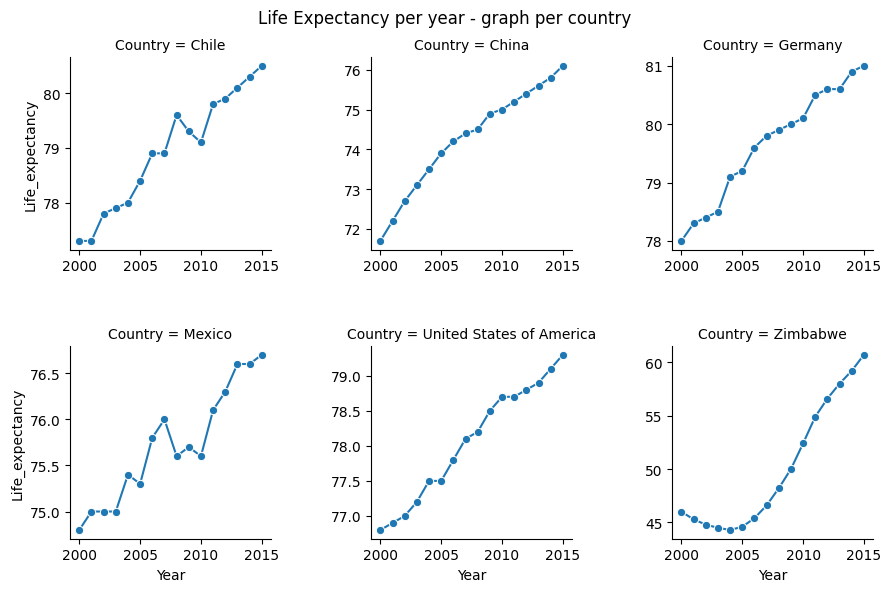

In [29]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=3, sharex=False, sharey=False)
g.map(sns.lineplot, 'Year', 'Life_expectancy', marker='o')
plt.subplots_adjust(top=0.9, wspace=0.5, hspace=0.5)
plt.suptitle('Life Expectancy per year - graph per country')
plt.show()


* Like with the GDP graphs for each country, the Life Expectancy graphs show increase in Life Expectancy for each of the six countries during the relevent time period.
* For some of the countries (China, Germany, USA) the rise in Life Expectancy was consistent, whereas for the other countries (Chile, Mexico, Zimbabwe) there were ups and downs in between.
* Zimbabwe had the biggest increase in Life Expectancy in absolute terms - about 15 years (!) rise in Life Expectancy within 15 years.

The separate graphs for Life Expectancy appear to be generally similar to the separate graphs for GDP. Are these two quantities correlated? Let's inverstigate.

## Life Expectancy vis-a-vis GDP - graph per country

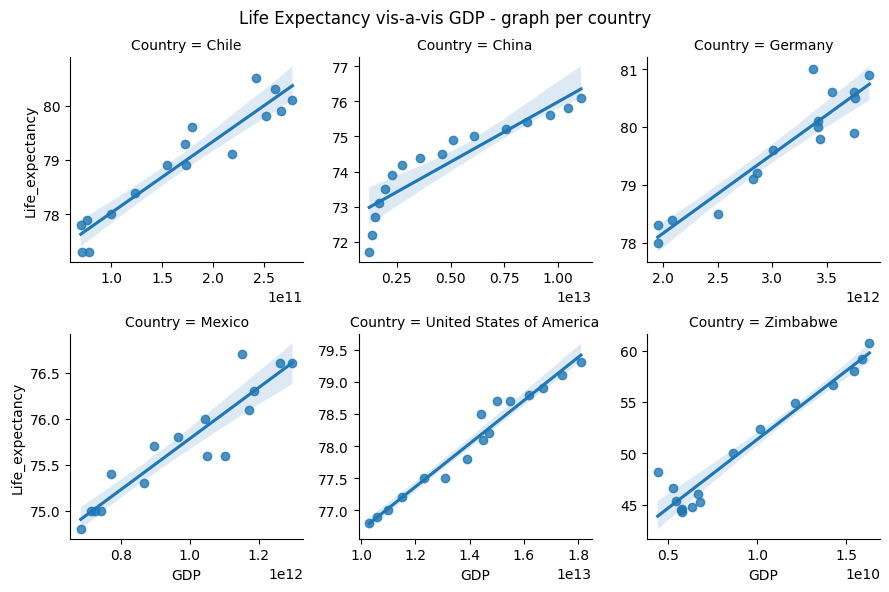

In [32]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=3, sharex=False, sharey=False)
g.map(sns.regplot, 'GDP', 'Life_expectancy') # Place scatter plots with regression lines in the grid
plt.subplots_adjust(top=0.9)
plt.suptitle('Life Expectancy vis-a-vis GDP - graph per country')
plt.show()


{'label': 'Chile', 'ax': <Axes: title={'center': 'Country = Chile'}>}
{'label': 'China', 'ax': <Axes: title={'center': 'Country = China'}>}
{'label': 'Germany', 'ax': <Axes: title={'center': 'Country = Germany'}>}
{'label': 'Mexico', 'ax': <Axes: title={'center': 'Country = Mexico'}>}
{'label': 'United States of America', 'ax': <Axes: title={'center': 'Country = United States of America'}>}
{'label': 'Zimbabwe', 'ax': <Axes: title={'center': 'United States of America (r=0.98)'}>}


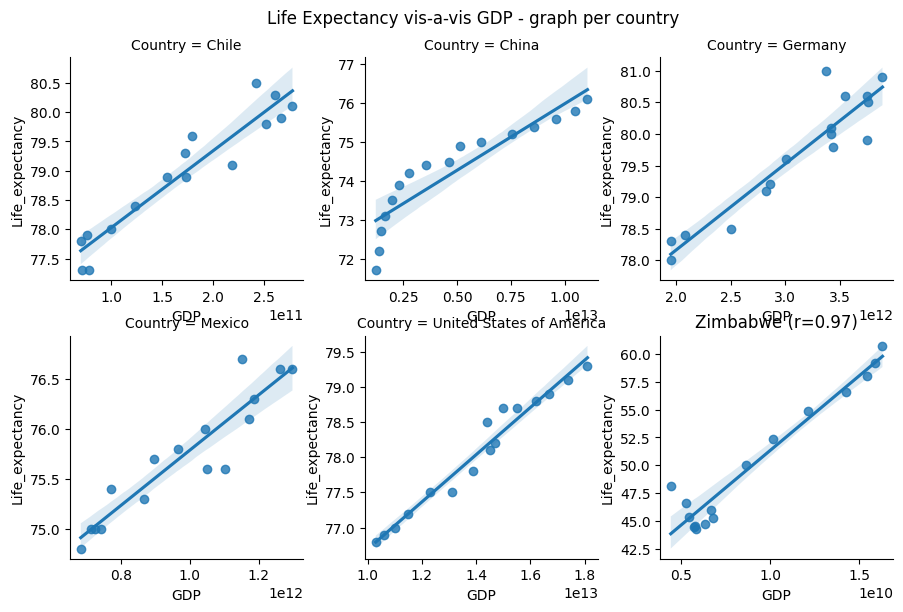

In [46]:
g = sns.FacetGrid(df_all, col="Country", col_wrap=3, col_order=countries, height=3, sharex=False, sharey=False)
def plot_with_correlation(data, **kwargs):
    print(kwargs)
    sns.regplot(data=data, x='GDP', y='Life_expectancy', **kwargs)
    # Calculate Pearson correlation
    corr = data['GDP'].corr(data['Life_expectancy'])
    # Set the title with the correlation
    plt.title(f"{label} (r={corr:.2f})")
# Map the function to the grid
for ax, label in zip(g.axes.flat, g.col_names):
    subset = df_all[df_all['Country'] == label]
    plot_with_correlation(subset, label=label, ax=ax)
plt.subplots_adjust(top=0.9)
plt.suptitle('Life Expectancy vis-a-vis GDP - graph per country')
plt.show()


So there definitely seems to be a strong correlation between GDP and Life Expectancy for the same country, for these six counties and for the relevant time period.

# Summary

* In the dataset we were given timeline data for six countries. We were given GDP and Life Expectancy for each country, for each year between 2000-2015.
* Regarding GDP, the countries are divided in different scales (Chine and USA, Germany and Mexico, Chile, Zimbabwe)
* Regarding Life Expetancy, the most striking fact is the low Life Expectancy in Zimbabwe, especially at the start of the relevant period (about 45 years). But Zimbabwe also shows a steep increase of Life Expectancy during these years, up to about 60 years.
* Regardless of the above differences between the countries, within each country there seemed to be a strong positive linear correlation between GDP and Life Expectancy.